# Using tf-idf approach to generate features

### Loading all the necessary packages for the subsequant analysis:

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import string
import utils
import glob
import re

---

## Read in German stopwords:

This list helps to avoid gathering unneccessary words and thus improves the overall score.

In [2]:
stopword = pd.read_csv('/Users/torben/PycharmProjects/toolbox/data/stopwords/stopwords.csv', index_col=None, header=0)
stopword_u = pd.read_csv('/Users/torben/PycharmProjects/toolbox/data/stopwords/stopwordsupper.csv', index_col=None, header=0)
swl = [stopword,stopword_u]

In [3]:
stopword_list = pd.concat(swl)
stopwordlist = stopword_list['words'].values.tolist()

---
# Generate Test and Train Data

This for-loop goes through the gathered data and builds dataframes for further analysis.

## Train Data:

In [4]:
category = {
    1: 'politik', 2: 'wirtschaft', 3: 'finanzen', 4: 'feuilleton', 5: 'sport', 6: 'gesellschaft', 7: 'stil', 
    8: 'technik-motor', 9: 'wissen', 10: 'reise', 11: 'beruf-chance'
}

In [5]:
frames = []

for key, value in category.items():
    raw_faz = utils.train_tables(value)
    frames.append(raw_faz)
    faz_train = pd.concat(frames, axis=0, ignore_index=True)
    
faz_train = faz_train.drop_duplicates()

Split the train set in the four classes we aim to predict in the end (Politics, Sports, Economy and the rest)

In [6]:
faz_pol = faz_train.loc[faz_train['label'] == 'politik', ['title', 'detailed']]
faz_pol['goal_val'] = 1

faz_sport = faz_train.loc[faz_train['label'] == 'sport', ['title', 'detailed']]
faz_sport['goal_val'] = 2

faz_eco = faz_train.loc[faz_train['label'] == 'wirtschaft', ['title', 'detailed']]
faz_eco['goal_val'] = 3

faz_feu = faz_train.loc[faz_train['label'] == 'feuilleton', ['title', 'detailed']]
faz_feu['goal_val'] = 4

faz_fin = faz_train.loc[faz_train['label'] == 'finanzen', ['title', 'detailed']]
faz_fin['goal_val'] = 5

faz_ges = faz_train.loc[faz_train['label'] == 'gesellschaft', ['title', 'detailed']]
faz_ges['goal_val'] = 6

In [7]:
faz_train_2 = faz_train.copy()

faz_rem = faz_train_2.loc[(faz_train_2['label'].isin(['stil', 'technik-motor', 'wissen', 'reise', 'beruf-chance']), ['title', 'detailed'])]
faz_rem['goal_val'] = 0

---
---
### Build a wordcloud for the respective buzzwords:

In [8]:
rgx_singles = re.compile("([\w][\w']*[\w])")
rgx_doubles = re.compile("([\w][\w']*[\w] +[\w][\w']*[\w])")
rgx_triples = re.compile("([\w][\w']*[\w] +[\w][\w']*[\w] +[\w][\w']*[\w])")

translator = str.maketrans('', '', string.punctuation)

---

In [9]:
pol_word = []

for index, row in faz_pol.iterrows():
    line = row['detailed'].lower()
    line = row['detailed'].translate(translator)
    pol_word += rgx_singles.findall(line)
    pol_word += rgx_doubles.findall(line)
    pol_word += rgx_triples.findall(line)
            
pol_text = pd.Series(pol_word).str.cat(sep=' ')

In [10]:
sport_word = []

for index, row in faz_sport.iterrows():
    line = row['detailed'].lower()
    line = row['detailed'].translate(translator)
    sport_word += rgx_singles.findall(line)
    sport_word += rgx_doubles.findall(line)
    sport_word += rgx_triples.findall(line)
    
sport_text = pd.Series(sport_word).str.cat(sep=' ')

In [11]:
eco_word = []

for index, row in faz_eco.iterrows():
    line = row['detailed'].lower()
    line = row['detailed'].translate(translator)
    eco_word += rgx_singles.findall(line)
    eco_word += rgx_doubles.findall(line)
    eco_word += rgx_triples.findall(line)
    
eco_text = pd.Series(eco_word).str.cat(sep=' ')

---
## Create word clouds for selected ressorts:

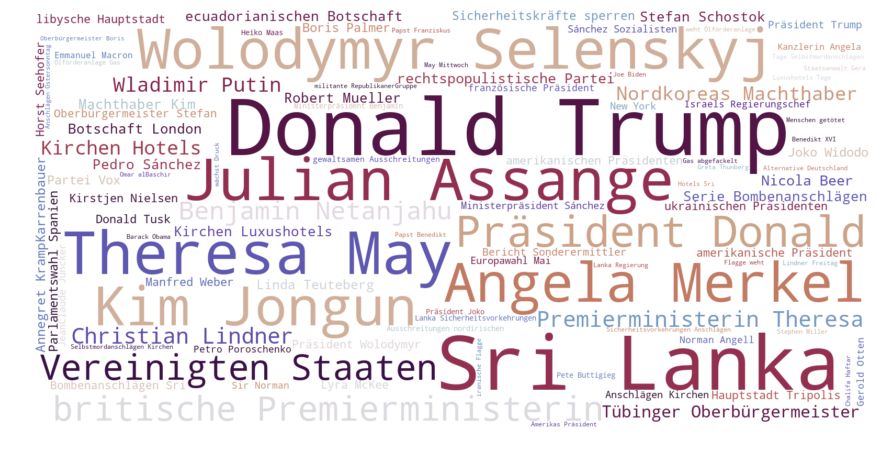

In [12]:
utils.get_wordcloud(pol_text, stopwordlist)

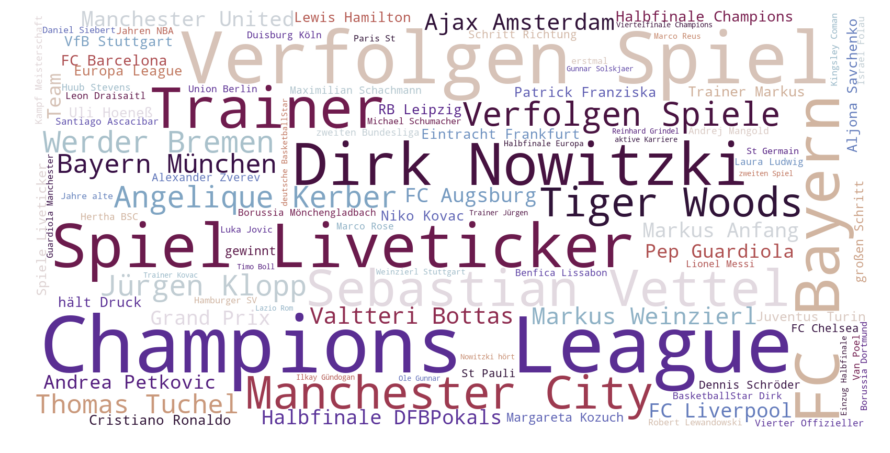

In [13]:
utils.get_wordcloud(sport_text, stopwordlist)

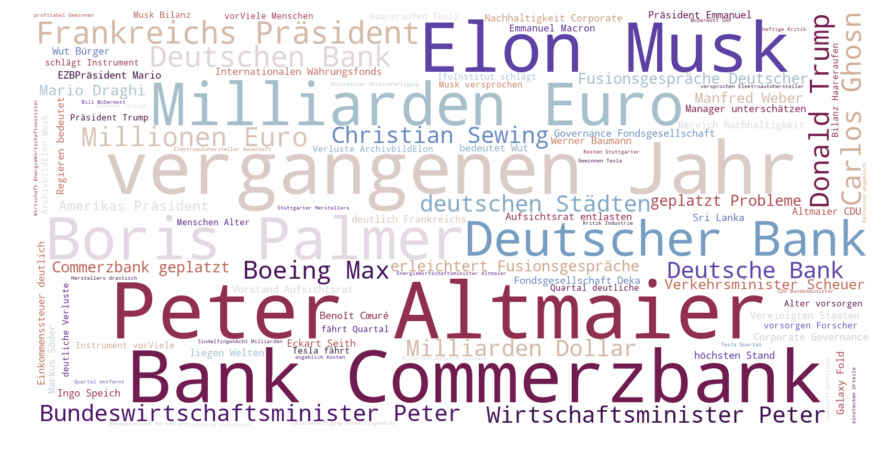

In [14]:
utils.get_wordcloud(eco_text, stopwordlist)

---